In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

*Separating Categorical from Continuous Variables*

In [4]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')
print (df_cat.shape, df_num.shape)

(1460, 43) (1460, 38)


In [5]:
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [6]:
#Checking correlation between numerical variables and SalePrice
df_num.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

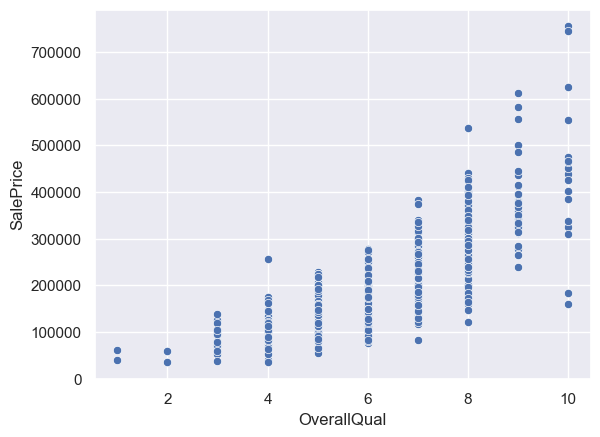

In [7]:
sns.scatterplot(data=df_num, x='OverallQual', y='SalePrice')

/var/folders/yb/s95tfwgn1mx2gbc35cktptdw0000gn/T/ipykernel_4192/3168171692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

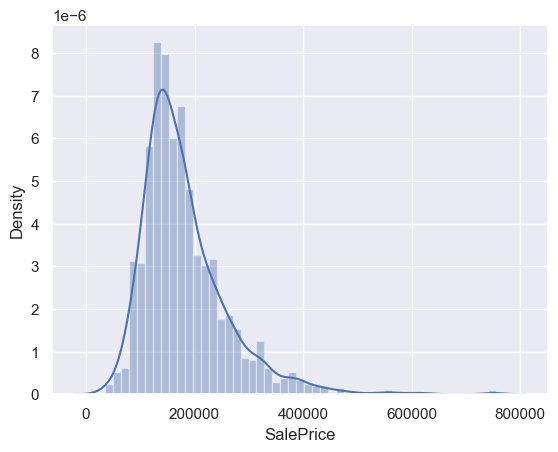

In [8]:
sns.distplot(df['SalePrice'])

In [9]:
df.shape

(1460, 81)

In [10]:
#Find outliers in SalePrice basis some reasonable IQR. Take care that Outliers should not be more than 2% of the total dataseta
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
df['SalePrice'].describe()
Out_Upper = Q3 + 2.5 * IQR
Qut_Lower = Q1 - 2.5 * IQR
#Find outliers in SalePrice basis Out_Upper and Out_Lower
print (f"We are dropping {df[(df['SalePrice'] > Out_Upper) | (df['SalePrice'] < Qut_Lower)].shape[0]} number of records out of {df.shape[0]}")

We are dropping 21 number of records out of 1460


In [11]:
df = df[(df['SalePrice'] < Out_Upper) & (df['SalePrice'] > Qut_Lower)]
df.shape

(1439, 81)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

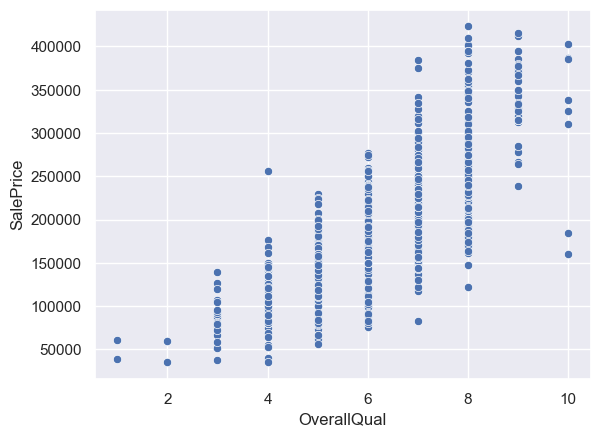

In [12]:
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')

In [13]:
drop_index = df[(df['SalePrice'] < 200000) & (df['OverallQual'] == 10)].index
df.drop(drop_index, inplace=True)
df.shape

(1437, 81)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

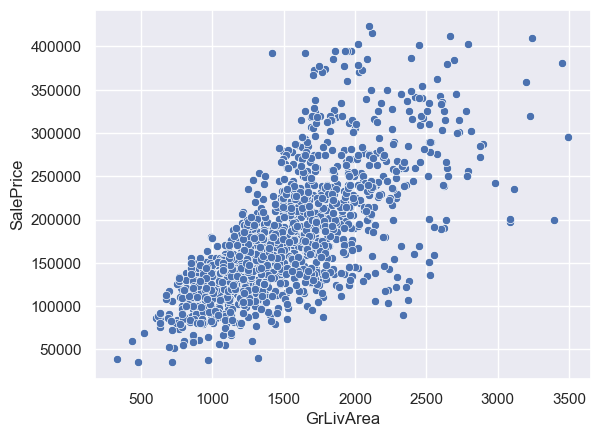

In [14]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

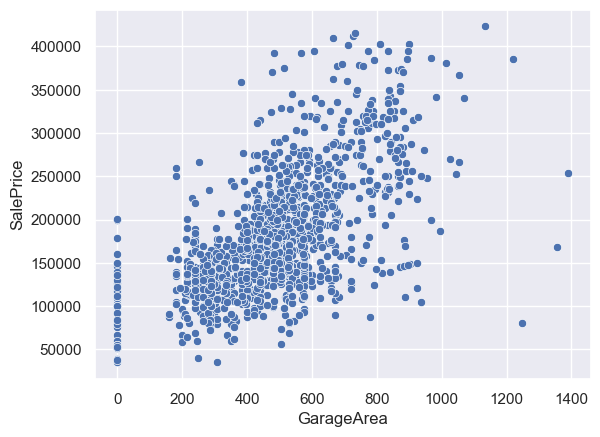

In [15]:
sns.scatterplot(x = df['GarageArea'], y = df['SalePrice'])

In [16]:
drop_index = (df[(df['GarageArea'] > 1200) & (df['SalePrice'] < 200000)]).index

In [17]:
df = df.drop(drop_index, axis=0)

In [18]:
df.shape

(1435, 81)

<Axes: xlabel='FullBath', ylabel='SalePrice'>

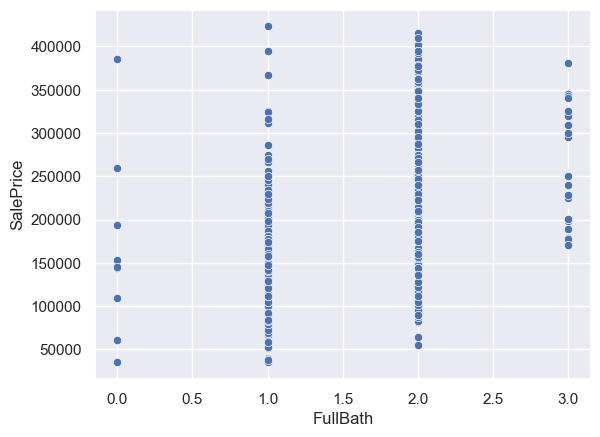

In [19]:
sns.scatterplot(x = df['FullBath'], y = df['SalePrice'])

### Categorical Features which seem to have a correlation with sales price basis boxplot

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

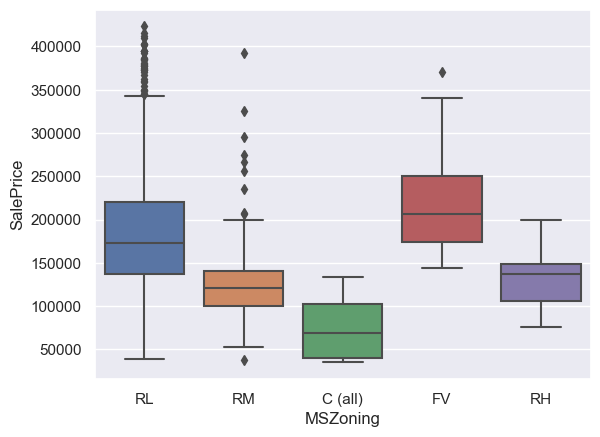

In [20]:
sns.boxplot(x = df['MSZoning'], y = df['SalePrice'])

***Dealing with Missing Data***

In [21]:
#Finding missing data
df.isnull().sum().sort_values(ascending=False)

PoolQC         1430
MiscFeature    1382
Alley          1344
Fence          1156
MasVnrType      867
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [22]:
# Check missing data
df.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          1430
MiscFeature     1382
Alley           1344
Fence           1156
MasVnrType       867
FireplaceQu      689
LotFrontage      256
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         7
Electrical         1
dtype: int64

In [23]:
df['PoolQC'].value_counts()

PoolQC
Fa    2
Gd    2
Ex    1
Name: count, dtype: int64

<Axes: xlabel='PoolQC', ylabel='SalePrice'>

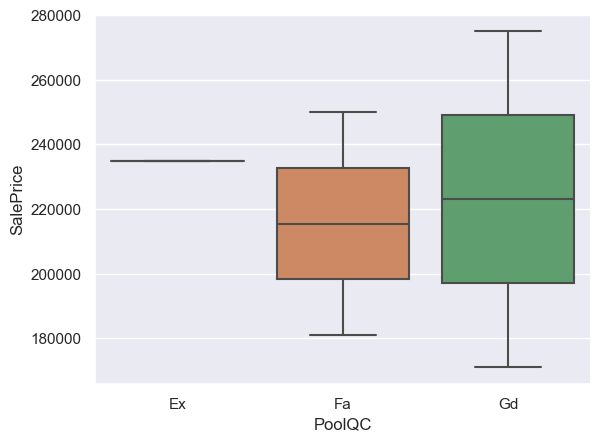

In [24]:
sns.boxplot(x = df['PoolQC'], y = df['SalePrice'])

In [25]:
df.drop('PoolQC', axis='columns', inplace=True)

In [26]:
df.drop('MiscFeature', axis='columns', inplace=True)

<Axes: xlabel='Alley', ylabel='SalePrice'>

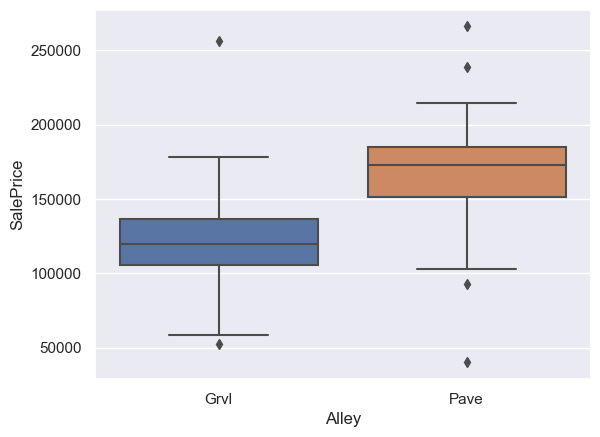

In [27]:
sns.boxplot(x = df['Alley'], y = df['SalePrice'])

In [28]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

***Choosing to replace NA in Alley since this feature seems to have a positive linear correlation with SalesPrice***

In [29]:
df['Alley'].fillna('Unknown', inplace=True)
df['Alley'].value_counts()

Alley
Unknown    1344
Grvl         50
Pave         41
Name: count, dtype: int64

In [30]:
df['Fence'].value_counts()

Fence
MnPrv    156
GdPrv     58
GdWo      54
MnWw      11
Name: count, dtype: int64

<Axes: xlabel='Fence', ylabel='SalePrice'>

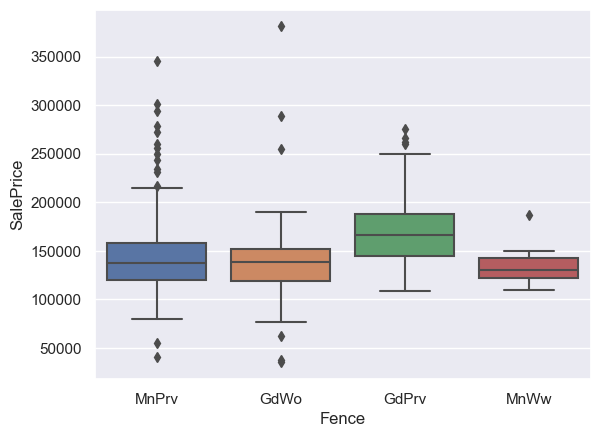

In [31]:
sns.boxplot(x = df['Fence'], y = df['SalePrice'])

In [32]:
df.drop('Id', inplace=True, axis = 'columns')

In [36]:
df.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

In [63]:
sns.boxplot(x = df['Utilities'], y = df['SalePrice'])  

KeyError: 'Utilities'

In [61]:
df['Utilities'].value_counts()
# Utilities does not seem to be a predictor for SalePrice. Hence, we can drop it
df.drop('Utilities', axis='columns', inplace=True)

<Axes: xlabel='Condition2', ylabel='SalePrice'>

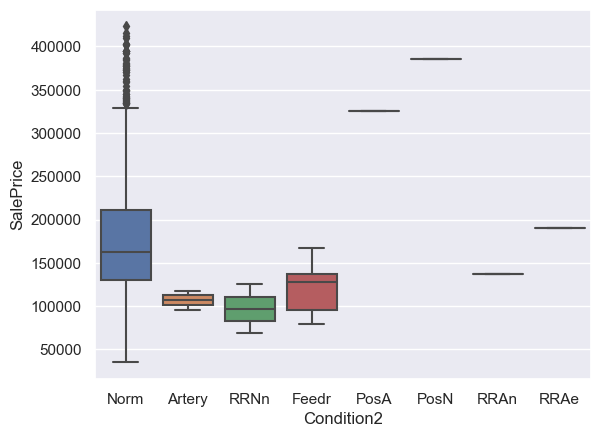

In [72]:
sns.boxplot(x = df['Condition2'], y = df['SalePrice'])  

In [73]:
df['Condition2'].value_counts()
# Taking a call to drop Condition2 as it does not seem to be a predictor for SalePrice

Condition2
Norm      1421
Feedr        6
Artery       2
RRNn         2
PosA         1
PosN         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [74]:
df.drop('Condition2', axis='columns', inplace=True)

In [96]:
df['RoofMatl'].value_counts()

RoofMatl
CompShg    1412
Tar&Grv      11
WdShake       5
WdShngl       4
Metal         1
Membran       1
Roll          1
Name: count, dtype: int64

In [97]:
# Dropping RoofMatl as it does not seem to be a predictor for SalePrice and is centred around one value
df.drop('RoofMatl', axis='columns', inplace=True)

<Axes: xlabel='Exterior1st', ylabel='SalePrice'>

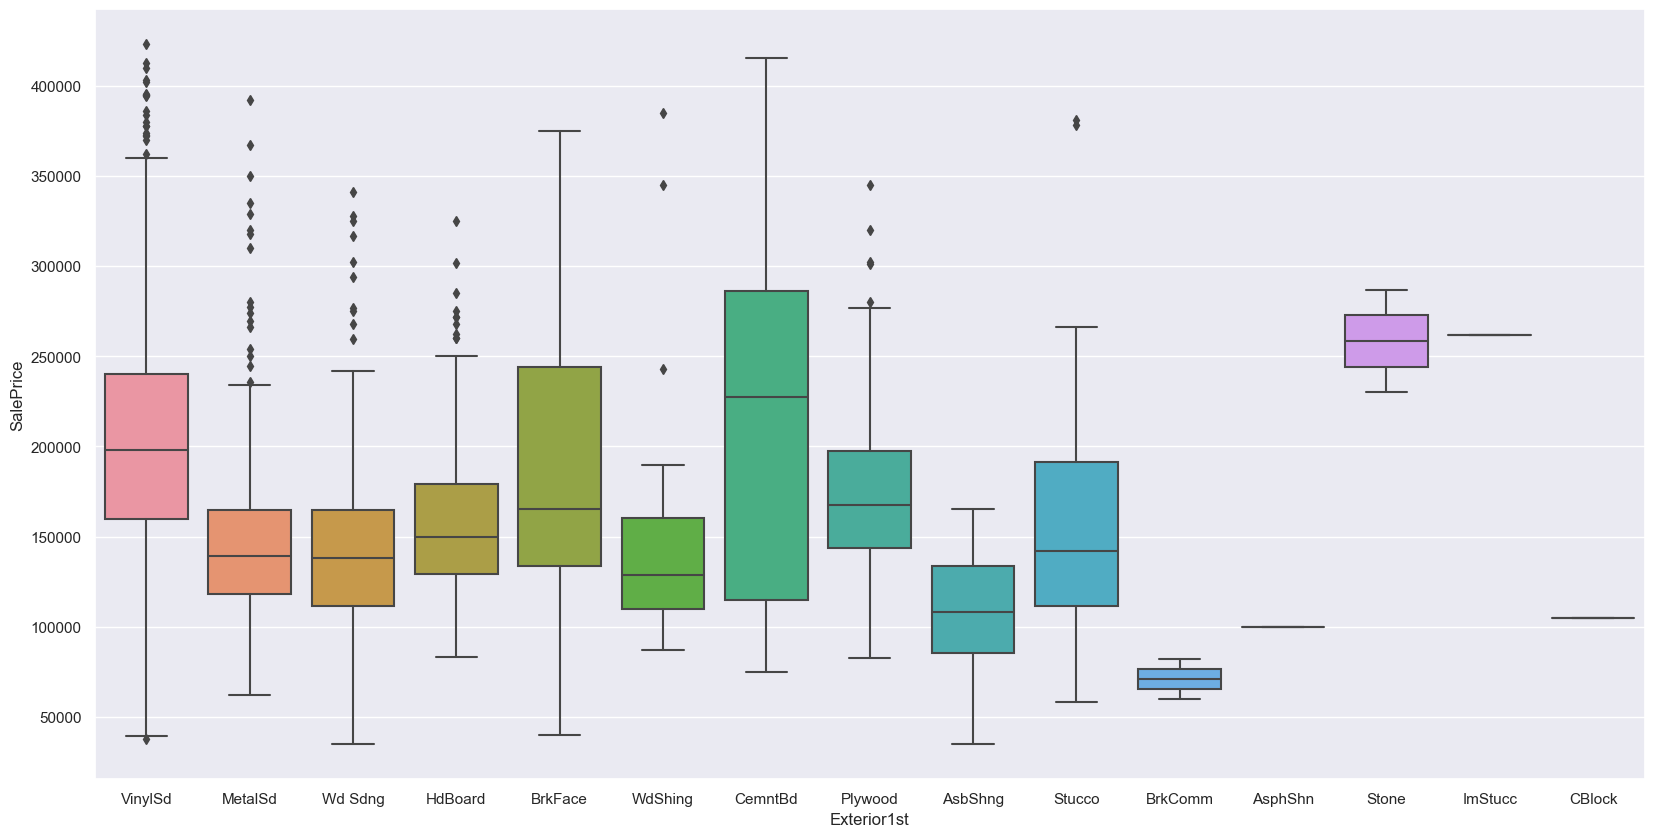

In [100]:
#Boxplot for Exterior1st, make categories on x axis readable
plt.figure(figsize=(20, 10))
sns.boxplot(x = df['Exterior1st'], y = df['SalePrice'])

In [99]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    503
HdBoard    220
MetalSd    218
Wd Sdng    204
Plywood    108
CemntBd     56
BrkFace     49
WdShing     26
Stucco      24
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [101]:
#Replacing BrkComm, Stone, AsphShn, CBlock, ImStucc with Other
df['Exterior1st'].replace(['BrkComm', 'Stone', 'AsphShn', 'CBlock', 'ImStucc'], 'Other', inplace=True)
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    503
HdBoard    220
MetalSd    218
Wd Sdng    204
Plywood    108
CemntBd     56
BrkFace     49
WdShing     26
Stucco      24
AsbShng     20
Other        7
Name: count, dtype: int64

<Axes: xlabel='Exterior2nd', ylabel='SalePrice'>

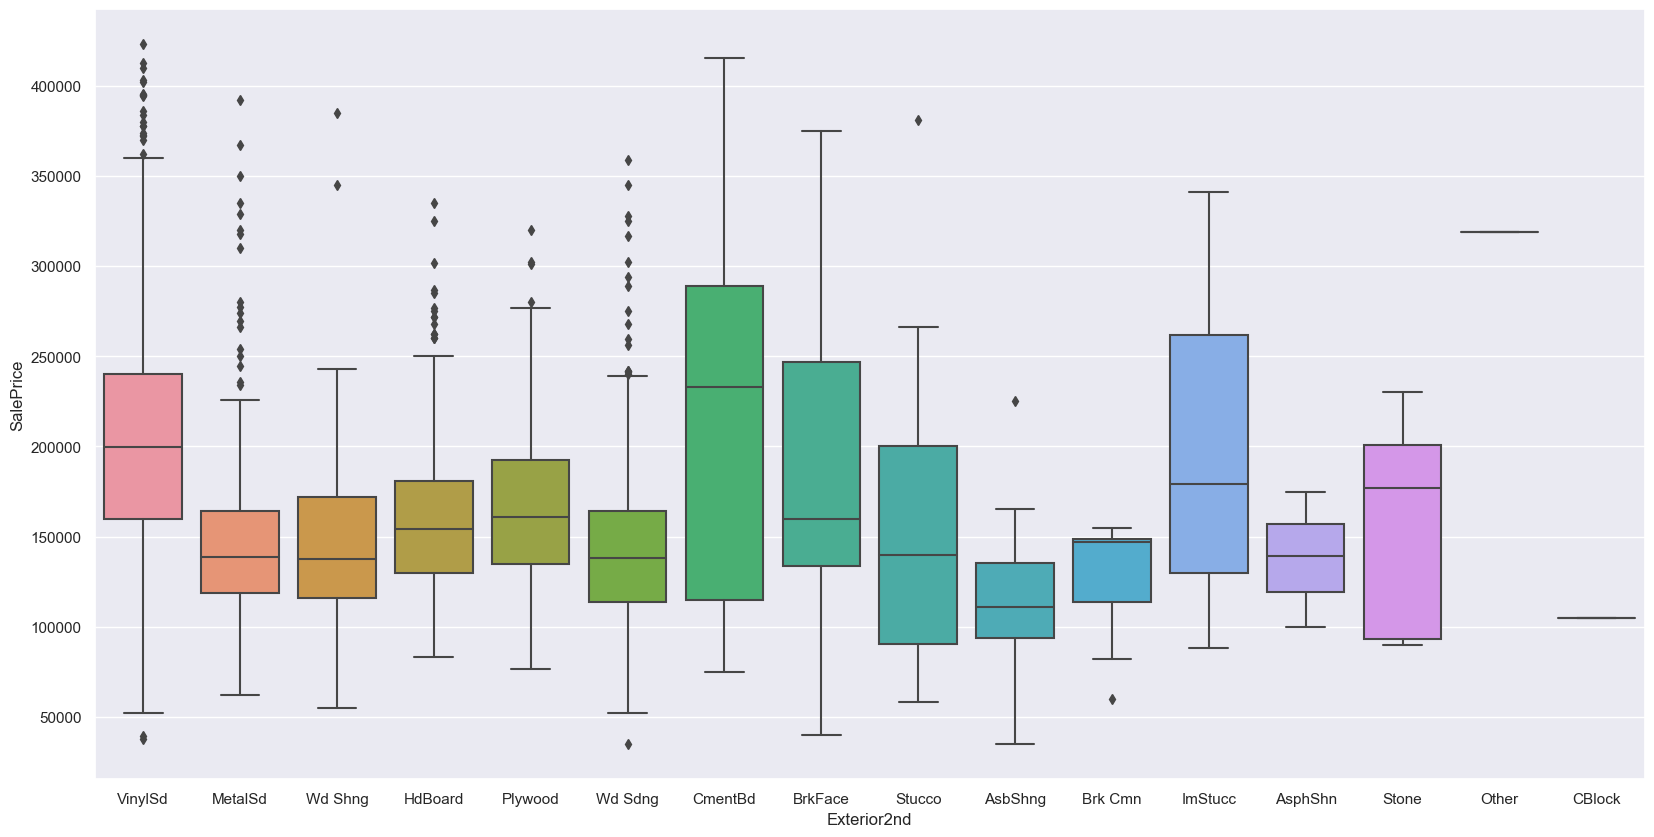

In [103]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = df['Exterior2nd'], y = df['SalePrice'])

In [104]:
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    492
MetalSd    212
HdBoard    205
Wd Sdng    196
Plywood    142
CmentBd     56
Wd Shng     37
Stucco      25
BrkFace     24
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [105]:
#Replace ImStucc, Brk Cmn, Stone, AsphShn, CBlock, Other with Other
df['Exterior2nd'].replace(['ImStucc', 'Brk Cmn', 'Stone', 'AsphShn', 'CBlock', 'Other'], 'Other', inplace=True)
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    492
MetalSd    212
HdBoard    205
Wd Sdng    196
Plywood    142
CmentBd     56
Wd Shng     37
Other       26
Stucco      25
BrkFace     24
AsbShng     20
Name: count, dtype: int64